# Author - Fazal Diyan

# Task # 3 - Exploratory Data Analysis - Terrorism

#### -Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
#### -As a security/defense analyst, try to find out the hot zone of terrorism.
#### -What all security issues and insights you can derive by EDA?

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
terror = "./globalterrorismdb.csv"
df = pd.read_csv(terror , encoding='ISO-8859-1')
df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_2580\3170032502.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(terror , encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:


df.shape



(181691, 135)

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
#Renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                   'region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude',
                   'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType',
                   'weaptype1_txt':'WeaponType','gname':'Group','nkill':'Killed','nwound':'Wounded','summary':'Summary','motive':'Motive'}, inplace = True)

In [7]:
#Extracting Necessary Columns
df=df[['eventid','Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','TargetType','TargetSubType'
       ,'suicide','Killed','Wounded','Summary','Group','WeaponType','Motive']]

In [8]:
#Seeing First Five Entries
df.head()

,eventid,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,TargetType,TargetSubType,suicide,Killed,Wounded,Summary,Group,WeaponType,Motive
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,0,1.0,0.0,NaN,MANO-D,Unknown,NaN
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0,0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,0,1.0,0.0,NaN,Unknown,Unknown,NaN
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Explosives,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Incendiary,NaN


In [9]:
df.describe()

,eventid,Year,Month,Day,Latitude,Longitude,suicide,Killed,Wounded
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.036507,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.187549,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000


# Exploratory Data Analysis

##### Number of Global Attacks per year

Text(0, 0.5, 'Incidents')

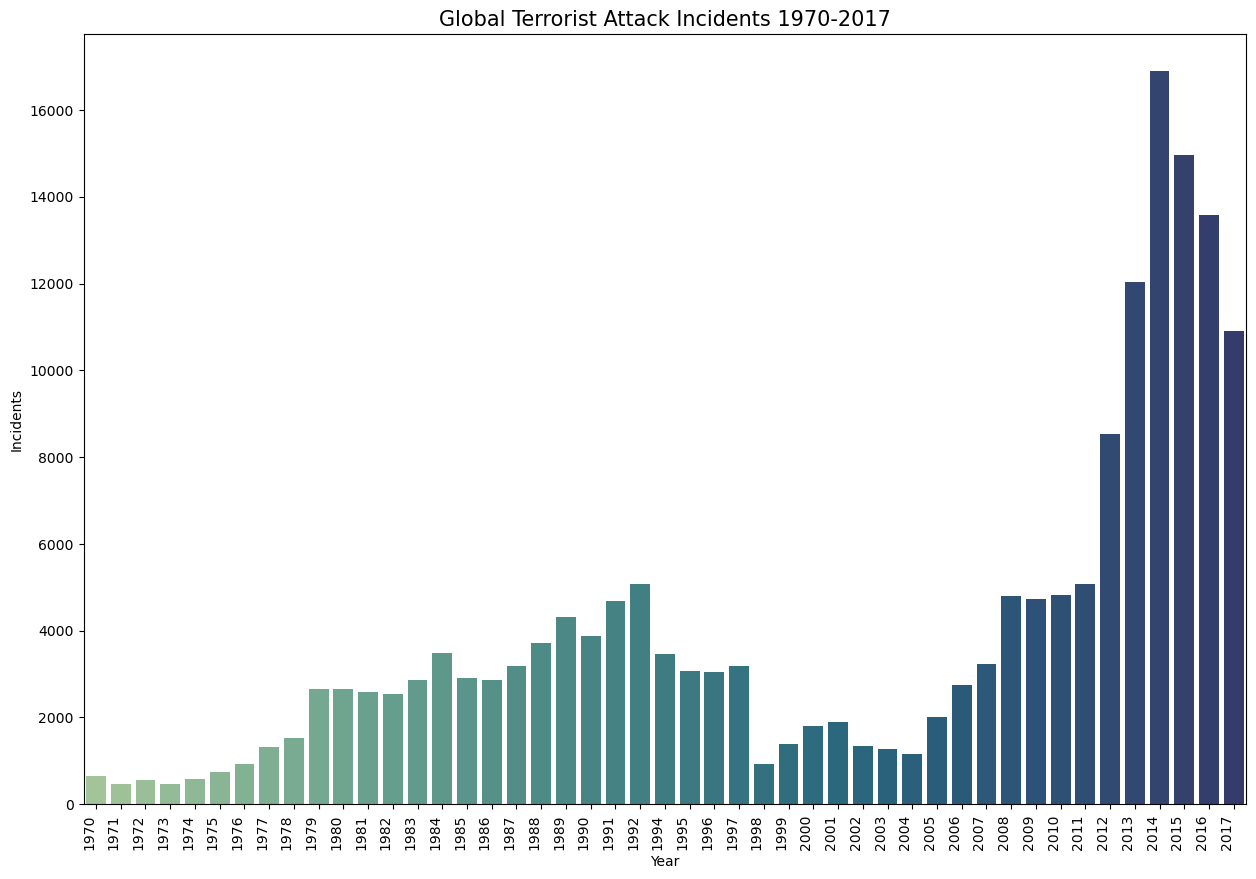

In [10]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Year',data=df,palette='crest')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Global Terrorist Attack Incidents 1970-2017',size=15)
plt.ylabel('Incidents')

##### Types of Terror Attack

Text(0, 0.5, 'Count of Year')

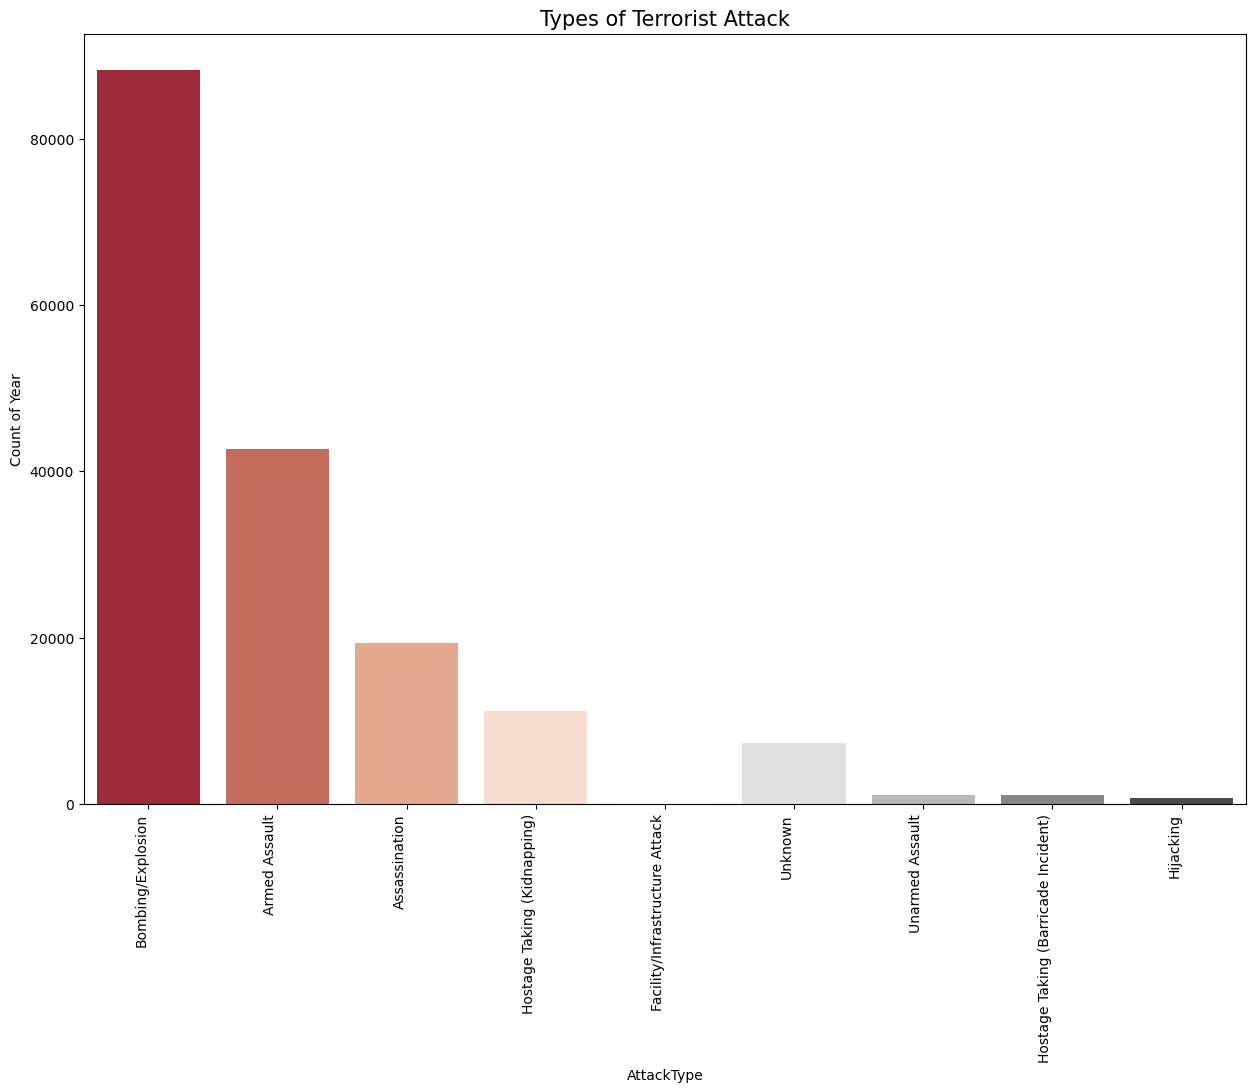

In [11]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='AttackType',data=df,palette='RdGy',order = df['AttackType'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Types of Terrorist Attack',size=15)
plt.ylabel('Count of Year')

##### Global Bombings

In [12]:
df_bombing = df[df['AttackType'] == 'Bombing/Explosion']

Text(-3.9305555555555483, 0.5, 'Incidents')

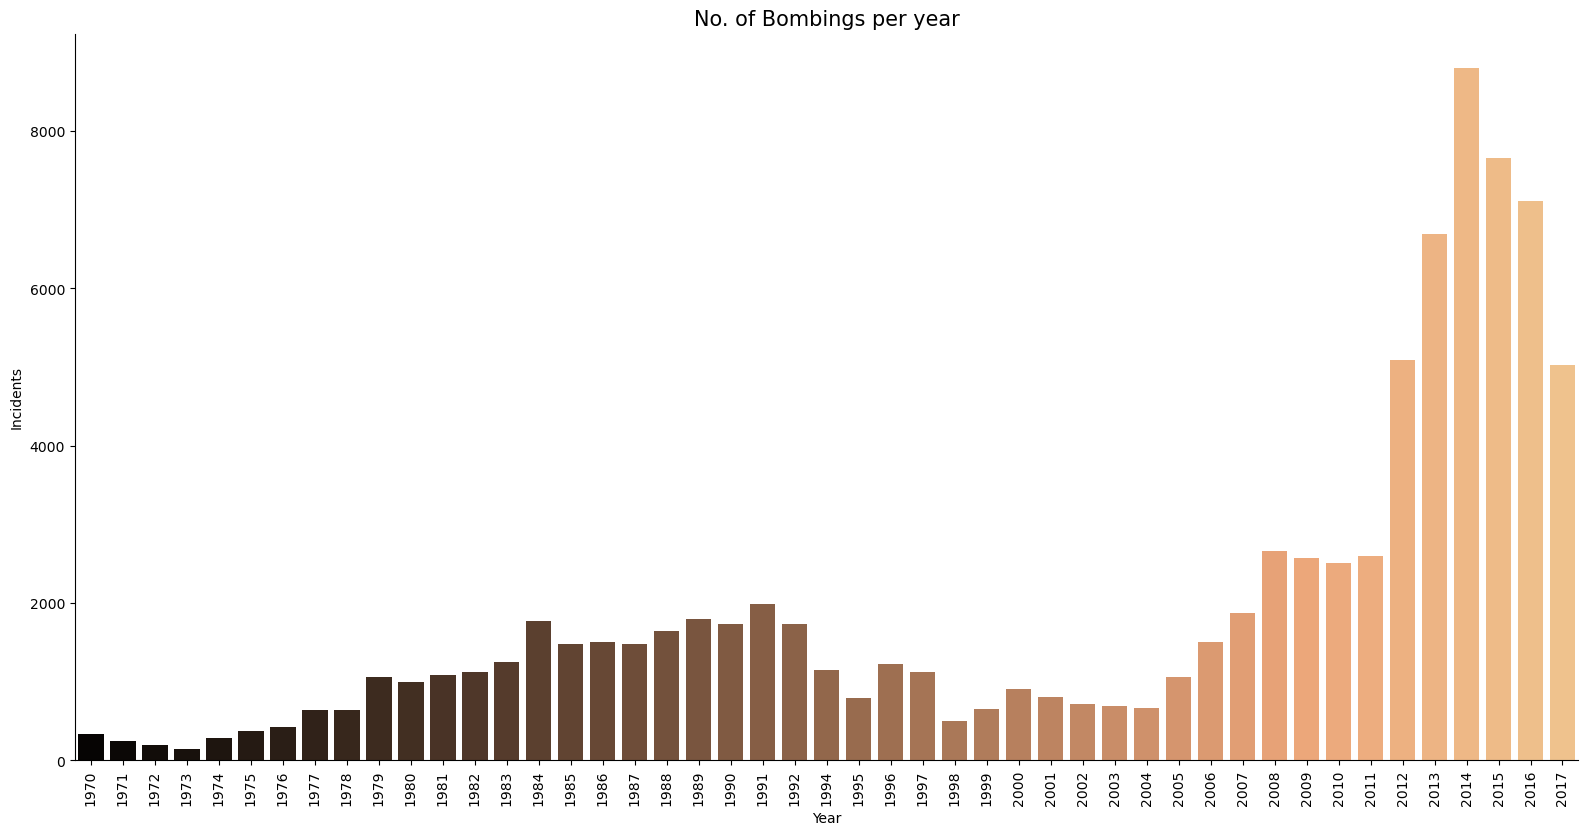

In [13]:
sns.catplot(x='Year',data=df_bombing,kind='count',height=8, aspect=2,palette='copper')
plt.xticks(rotation=90)
plt.title('No. of Bombings per year',size=15)
plt.ylabel('Incidents')

##### Terrorist Attack by Region

Text(0, 0.5, 'No. of Attacks')

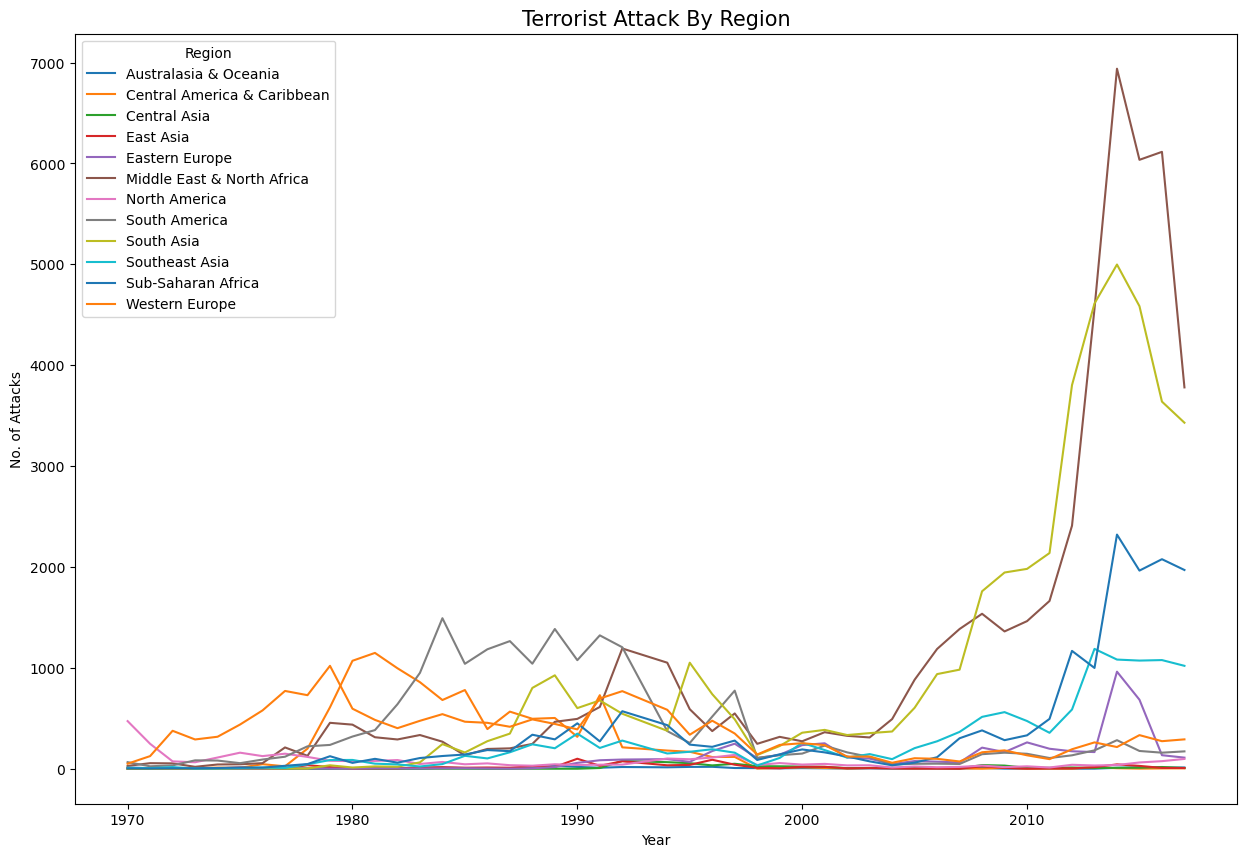

In [14]:
pd.crosstab(df.Year,df.Region).plot(figsize=(15,10))
plt.title('Terrorist Attack By Region',size=15)
plt.ylabel('No. of Attacks')

##### Target Type Plot

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type of Target')

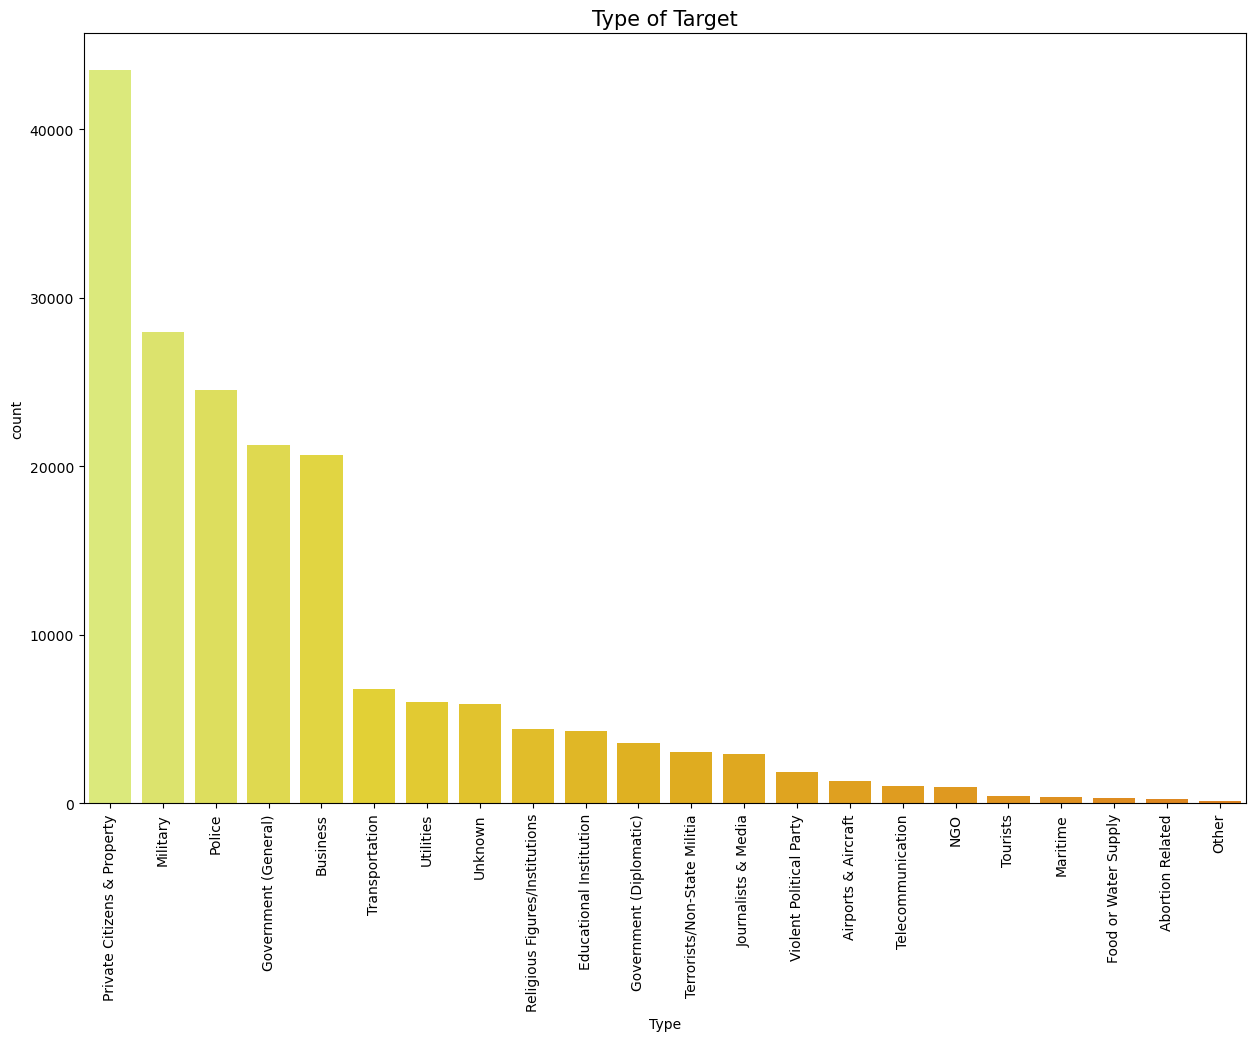

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(df['TargetType'],order=df['TargetType'].value_counts().index,palette='Wistia')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target',size=15)

##### Total Number of Terrorist Attack in each country

Text(0.5, 1.0, 'Top-10:Total Attacks by Country')

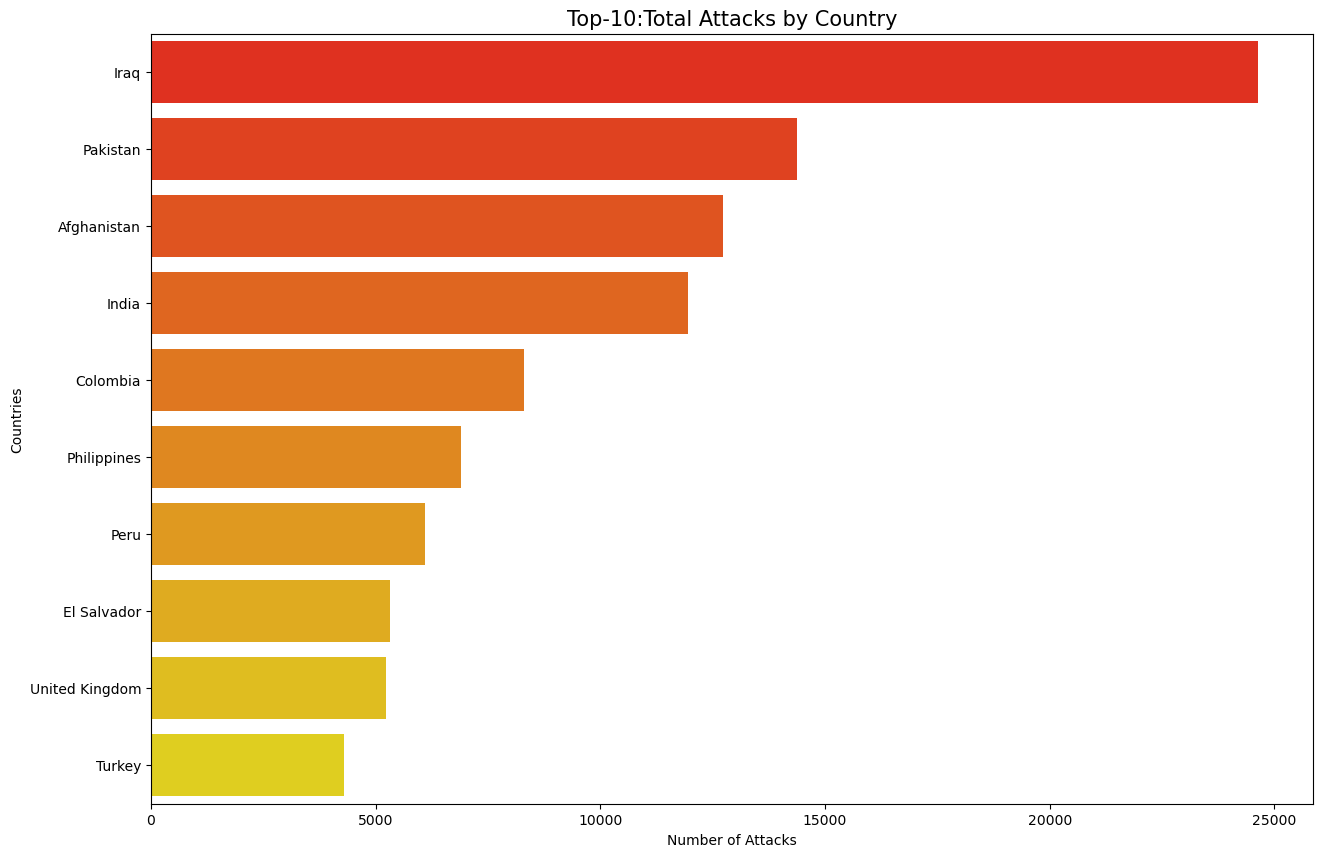

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x = df['Country'].value_counts().values[:10], y = df['Country'].value_counts()[:10].index,palette = 'autumn')
plt.xlabel('Number of Attacks')
plt.ylabel('Countries')
plt.title('Top-10:Total Attacks by Country',size=15)

##### Terrorist Attack By Region

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Attacks per Region (1970-2017)')

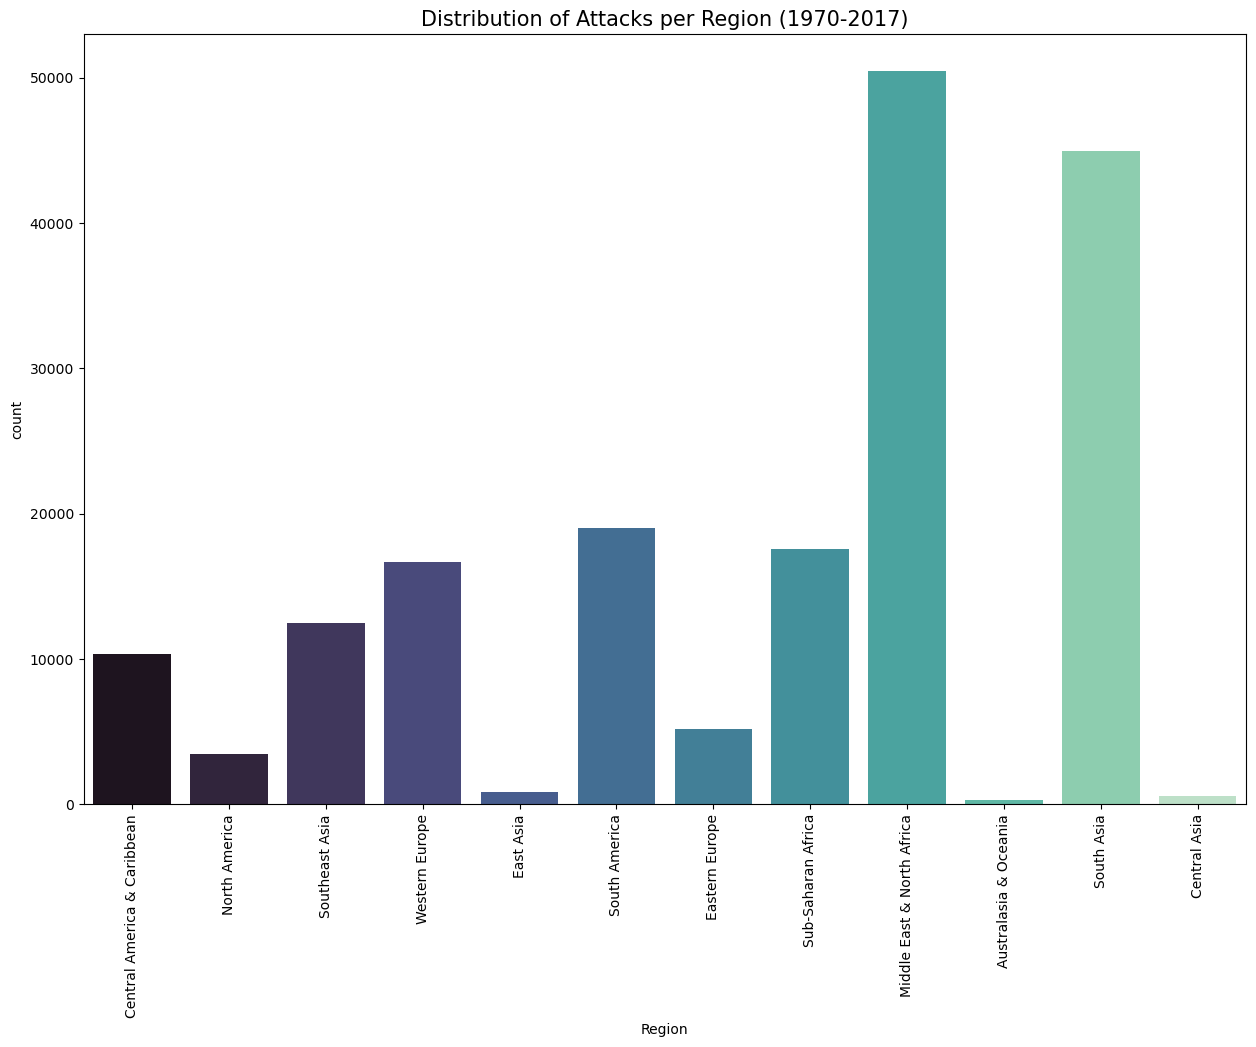

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot('Region', data=df, palette='mako')
plt.xticks(rotation=90)
plt.title('Distribution of Attacks per Region (1970-2017)', size=15)

##### Iraq Terrorism Analysis

In [18]:
#Preparing the data for analysis
Iraq = df[df.Country == 'Iraq']
Iraq_cities = Iraq.groupby(by='City',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

Iraq_suicide_size = Iraq['suicide'].sum() / len(Iraq)
labels = ['Suicide', 'Not Suicide']

Iraq_year = Iraq.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

Iraq_weapon = Iraq.groupby(by='WeaponType',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:,:2]

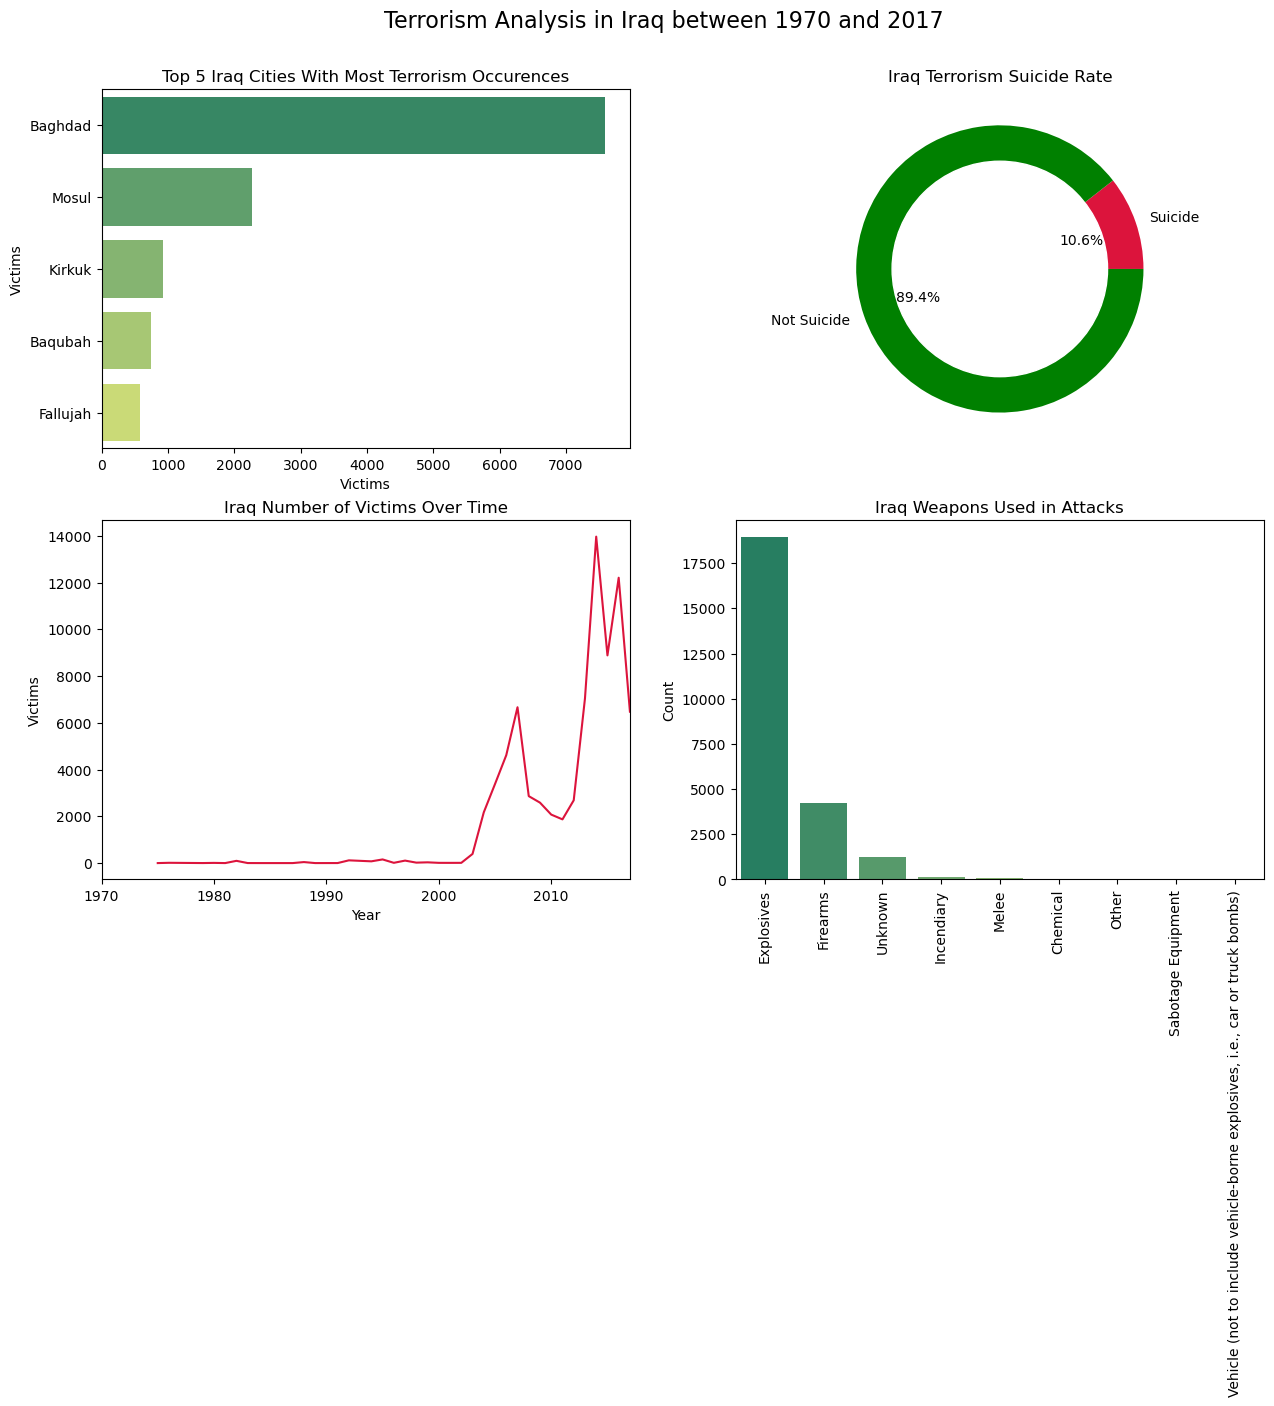

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='eventid', y='City', data=Iraq_cities, ci=None, ax=axs[0, 0],palette='summer')
axs[0, 0].set_title(f'Top 5 Iraq Cities With Most Terrorism Occurences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((Iraq_suicide_size, 1-Iraq_suicide_size), labels=labels,colors=['crimson','green'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('Iraq Terrorism Suicide Rate')
axs[0, 0].set_ylabel('Victims')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=Iraq_year, ax=axs[1, 0],color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Iraq Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='WeaponType', y='eventid', data=Iraq_weapon, ci=None, ax=axs[1, 1],palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Iraq Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in Iraq between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()